### 1. train 데이터 가져오기

In [1]:
train = pd.read_csv('datas/datas(kaggle)/train.csv', encoding='utf-8', parse_dates=['Date'])

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              17892 non-null  int64         
 1   Province/State  8190 non-null   object        
 2   Country/Region  17892 non-null  object        
 3   Lat             17892 non-null  float64       
 4   Long            17892 non-null  float64       
 5   Date            17892 non-null  datetime64[ns]
 6   ConfirmedCases  17892 non-null  int64         
 7   Fatalities      17892 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.1+ MB


In [3]:
train.isnull().sum()

Id                   0
Province/State    9702
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [4]:
# Province/State 결측치가 많으므로, 제거
train.dropna(axis=1, inplace=True)

#데이터 결합 위해 미리 column 명 변경
train.rename(columns = {'Country/Region':'country', 'Date':'date', 'Province/State' :'province', 'Lat':'lat', 'Long':'long'}, inplace = True)
train

,Id,country,lat,long,date,ConfirmedCases,Fatalities
0,1,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,2,Afghanistan,33.0000,65.0000,2020-01-23,0,0
2,3,Afghanistan,33.0000,65.0000,2020-01-24,0,0
3,4,Afghanistan,33.0000,65.0000,2020-01-25,0,0
4,5,Afghanistan,33.0000,65.0000,2020-01-26,0,0
...,...,...,...,...,...,...,...
17887,26378,Zambia,-15.4167,28.2833,2020-03-20,2,0
17888,26379,Zambia,-15.4167,28.2833,2020-03-21,2,0
17889,26380,Zambia,-15.4167,28.2833,2020-03-22,3,0
17890,26381,Zambia,-15.4167,28.2833,2020-03-23,3,0


### 2. 온도 데이터 가져오기

In [5]:
temperature = pd.read_csv("datas/datas(kaggle)/temperature_dataframe.csv", encoding='utf-8',parse_dates=[6])

In [6]:
temperature.isnull().sum()

index               0
id                  0
province         8937
country             0
lat                 0
long                0
date                0
cases               0
fatalities          0
capital             0
humidity          177
sunHour           177
tempC             177
windspeedKmph     177
dtype: int64

In [7]:
# 결측치 많은 province 열과 불필요한 열 제거
temperature.drop(columns = ['index', 'id', 'province', 'cases', 'fatalities', 'capital'], inplace=True)
temperature

,country,lat,long,date,humidity,sunHour,tempC,windspeedKmph
0,Afghanistan,33.0000,65.0000,2020-01-22,65.0,8.7,-1.0,8.0
1,Afghanistan,33.0000,65.0000,2020-01-23,59.0,8.7,-3.0,8.0
2,Afghanistan,33.0000,65.0000,2020-01-24,71.0,7.1,0.0,7.0
3,Afghanistan,33.0000,65.0000,2020-01-25,79.0,8.7,0.0,7.0
4,Afghanistan,33.0000,65.0000,2020-01-26,64.0,8.7,-1.0,8.0
...,...,...,...,...,...,...,...,...
16672,Zambia,-15.4167,28.2833,2020-03-17,86.0,6.0,24.0,12.0
16673,Zambia,-15.4167,28.2833,2020-03-18,84.0,8.8,25.0,12.0
16674,Zambia,-15.4167,28.2833,2020-03-19,86.0,8.8,25.0,10.0
16675,Zambia,-15.4167,28.2833,2020-03-20,81.0,11.6,25.0,11.0


### 3. train 데이터와 temperature 데이터 결합

In [8]:
df1 = pd.merge(train, temperature, how='left', on = ['country', 'date', 'lat', 'long'])
df1

,Id,country,lat,long,date,ConfirmedCases,Fatalities,humidity,sunHour,tempC,windspeedKmph
0,1,Afghanistan,33.0000,65.0000,2020-01-22,0,0,65.0,8.7,-1.0,8.0
1,2,Afghanistan,33.0000,65.0000,2020-01-23,0,0,59.0,8.7,-3.0,8.0
2,3,Afghanistan,33.0000,65.0000,2020-01-24,0,0,71.0,7.1,0.0,7.0
3,4,Afghanistan,33.0000,65.0000,2020-01-25,0,0,79.0,8.7,0.0,7.0
4,5,Afghanistan,33.0000,65.0000,2020-01-26,0,0,64.0,8.7,-1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
17887,26378,Zambia,-15.4167,28.2833,2020-03-20,2,0,81.0,11.6,25.0,11.0
17888,26379,Zambia,-15.4167,28.2833,2020-03-21,2,0,85.0,7.4,21.0,9.0
17889,26380,Zambia,-15.4167,28.2833,2020-03-22,3,0,NaN,NaN,NaN,NaN
17890,26381,Zambia,-15.4167,28.2833,2020-03-23,3,0,NaN,NaN,NaN,NaN


### 4. 국가별 인구 데이터 가져오기

In [9]:
world_population = pd.read_csv("datas/datas(kaggle)/population_by_country_2020.csv", encoding='utf-8')
world_population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [10]:
world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [11]:
world_population.rename(columns = {'Country (or dependency)': 'country','Density (P/Km²)': 'Density', 'Land Area (Km²)':'LandArea', 'Med. Age':'Med_Age',
                                   'Population (2020)': 'Population','Net Change': 'Net_Change' , 'Yearly Change': 'Yearly_Change'}, inplace = True)

In [12]:
world_population

,country,Population,Yearly_Change,Net_Change,Density,LandArea,Migrants (net),Fert. Rate,Med_Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06%,3,50,100,NaN,N.A.,N.A.,10%,0.00%
231,Falkland Islands,3480,3.05%,103,0,12170,NaN,N.A.,N.A.,66%,0.00%
232,Niue,1626,0.68%,11,6,260,NaN,N.A.,N.A.,46%,0.00%
233,Tokelau,1357,1.27%,17,136,10,NaN,N.A.,N.A.,0%,0.00%


### 5. train, temperature, world_population 데이터 결합

In [13]:
df2 = pd.merge(df1, world_population, how='left', on = 'country')
df2

,Id,country,lat,long,date,ConfirmedCases,Fatalities,humidity,sunHour,tempC,...,Population,Yearly_Change,Net_Change,Density,LandArea,Migrants (net),Fert. Rate,Med_Age,Urban Pop %,World Share
0,1,Afghanistan,33.0000,65.0000,2020-01-22,0,0,65.0,8.7,-1.0,...,38928346.0,2.33%,886592.0,60.0,652860.0,-62920.0,4.6,18,25%,0.50%
1,2,Afghanistan,33.0000,65.0000,2020-01-23,0,0,59.0,8.7,-3.0,...,38928346.0,2.33%,886592.0,60.0,652860.0,-62920.0,4.6,18,25%,0.50%
2,3,Afghanistan,33.0000,65.0000,2020-01-24,0,0,71.0,7.1,0.0,...,38928346.0,2.33%,886592.0,60.0,652860.0,-62920.0,4.6,18,25%,0.50%
3,4,Afghanistan,33.0000,65.0000,2020-01-25,0,0,79.0,8.7,0.0,...,38928346.0,2.33%,886592.0,60.0,652860.0,-62920.0,4.6,18,25%,0.50%
4,5,Afghanistan,33.0000,65.0000,2020-01-26,0,0,64.0,8.7,-1.0,...,38928346.0,2.33%,886592.0,60.0,652860.0,-62920.0,4.6,18,25%,0.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,26378,Zambia,-15.4167,28.2833,2020-03-20,2,0,81.0,11.6,25.0,...,18383955.0,2.93%,522925.0,25.0,743390.0,-8000.0,4.7,18,45%,0.24%
17888,26379,Zambia,-15.4167,28.2833,2020-03-21,2,0,85.0,7.4,21.0,...,18383955.0,2.93%,522925.0,25.0,743390.0,-8000.0,4.7,18,45%,0.24%
17889,26380,Zambia,-15.4167,28.2833,2020-03-22,3,0,NaN,NaN,NaN,...,18383955.0,2.93%,522925.0,25.0,743390.0,-8000.0,4.7,18,45%,0.24%
17890,26381,Zambia,-15.4167,28.2833,2020-03-23,3,0,NaN,NaN,NaN,...,18383955.0,2.93%,522925.0,25.0,743390.0,-8000.0,4.7,18,45%,0.24%


### 6. EDA

### (1) 데이터 확인, 전처리

In [14]:
# 결측치 0 대체, % 제거 후 float 형변환
df2['humidity'].fillna(0, inplace=True)
df2['sunHour'].fillna(0, inplace=True)
df2['tempC'].fillna(0, inplace=True)
df2['windspeedKmph'].fillna(0, inplace=True)

df2['Yearly_Change'].replace('N.A.','0', inplace=True)
df2['Yearly_Change']=df2['Yearly_Change'].replace('%','', regex=True).astype(float)

df2['Urban Pop %'].replace('N.A.','0', inplace=True)
df2['Urban Pop %'] = df2['Urban Pop %'].replace('%','', regex=True).astype(float)

df2['World Share'].replace('N.A.','0', inplace=True)
df2['World Share'] = df2['World Share'].replace('%','', regex=True).astype(float)

df2['Fert. Rate'].replace('N.A.','0', inplace=True)
df2['Fert. Rate'] = df2['Fert. Rate'].astype(float)

df2['Med_Age'].replace('N.A.','0', inplace=True)
df2['Med_Age'] = df2['Med_Age'].astype(float)

df2['Migrants (net)'].fillna(0, inplace=True)

In [15]:
# world_population 정보 없는 국가: 제거
df2.dropna(how="any", inplace=True)

In [16]:
df2.isnull().sum()

Id                0
country           0
lat               0
long              0
date              0
ConfirmedCases    0
Fatalities        0
humidity          0
sunHour           0
tempC             0
windspeedKmph     0
Population        0
Yearly_Change     0
Net_Change        0
Density           0
LandArea          0
Migrants (net)    0
Fert. Rate        0
Med_Age           0
Urban Pop %       0
World Share       0
dtype: int64

In [17]:
df2.describe()

,Id,lat,long,ConfirmedCases,Fatalities,humidity,sunHour,tempC,windspeedKmph,Population,Yearly_Change,Net_Change,Density,LandArea,Migrants (net),Fert. Rate,Med_Age,Urban Pop %,World Share
count,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000,1.688400e+04,16884.000000,1.688400e+04,16884.000000,1.688400e+04,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000
mean,13198.093284,26.636002,3.706750,333.146885,12.587894,44.518005,6.006503,11.550995,8.659263,2.737812e+08,0.790522,1.354769e+06,272.899254,4.076329e+06,183643.391791,2.059328,34.638060,68.093284,3.513619
std,7773.989561,22.983926,80.838168,3631.436729,179.436807,33.994092,4.513240,12.329945,8.608695,4.612956e+08,0.822143,1.948353e+06,1691.944428,4.387528e+06,434637.157815,0.905909,8.724023,21.260453,5.919579
min,1.000000,-41.454500,-157.498300,0.000000,0.000000,0.000000,0.000000,-21.000000,0.000000,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,0.000000,0.000000,0.000000,0.000000
25%,6224.250000,13.444300,-71.850600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.917695e+06,0.390000,4.158050e+04,36.000000,9.132500e+04,-11999.000000,1.700000,31.000000,58.750000,0.090000
50%,13377.500000,33.020300,9.525900,0.000000,0.000000,54.000000,7.100000,9.000000,7.000000,3.779438e+07,0.590000,3.311070e+05,74.000000,7.970850e+05,9235.500000,1.800000,38.000000,78.000000,0.485000
75%,20158.750000,42.501575,65.480925,12.000000,0.000000,75.000000,10.200000,23.000000,13.000000,3.310027e+08,1.097500,1.937734e+06,153.000000,9.147420e+06,242032.000000,2.100000,39.000000,83.000000,4.250000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000,99.000000,14.000000,45.000000,65.000000,1.439324e+09,3.680000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,6.100000,48.000000,98.000000,18.470000


### (2) 국가별 확진자 수

In [18]:
import chart_studio.plotly as py
import cufflinks as cf 
cf.go_offline(connected=True)

confiremd_num = pd.DataFrame(df2.ConfirmedCases.groupby(df2.country).agg(max))
confiremd_num.iplot(kind='bar')

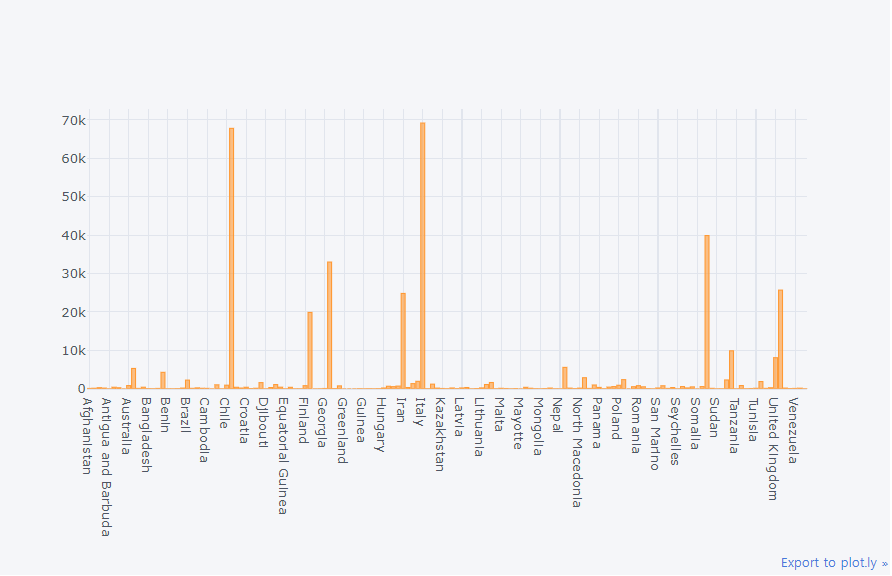

In [19]:
import PIL.Image as pilimg

confirmedcases = pilimg.open('datas/datas(kaggle)/confirmedcase.png')
confirmedcases

### (3) 국가별 사망자 수

In [20]:
death_num = pd.DataFrame(df2.Fatalities.groupby(df2.country).agg(max))
death_num.iplot(kind='bar')

### (4) 지도 상 시각화(국가별 사망자 수)

In [21]:
import folium

map_df = df2[df2['date']=='2020-03-24'][['country','lat', 'long','ConfirmedCases', 'Fatalities']]
map_osm = folium.Map(location = [41.8905,12.4942], zoom_start = 3)

In [22]:
for item in map_df.index:
    lat = map_df.loc[item, 'lat']
    long = map_df.loc[item, 'long']
    folium.CircleMarker([lat,long],
                        radius=map_df.loc[item, 'Fatalities']/200,
                        popup=map_df.loc[item,'Fatalities'],
                        color='orange',
                        fill=True).add_to(map_osm)
map_osm

### (5) 시간에 따른 누적 확진자, 사망자 수 증가 추이

In [23]:
date_confirmed = pd.DataFrame(df2.ConfirmedCases.groupby(df2.date).agg(sum))
date_death = pd.DataFrame(df2.Fatalities.groupby(df2.date).agg(sum))

In [24]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

f_path = "/Users/heejaelee/Library/Fonts/AppleGothic.ttf"

font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

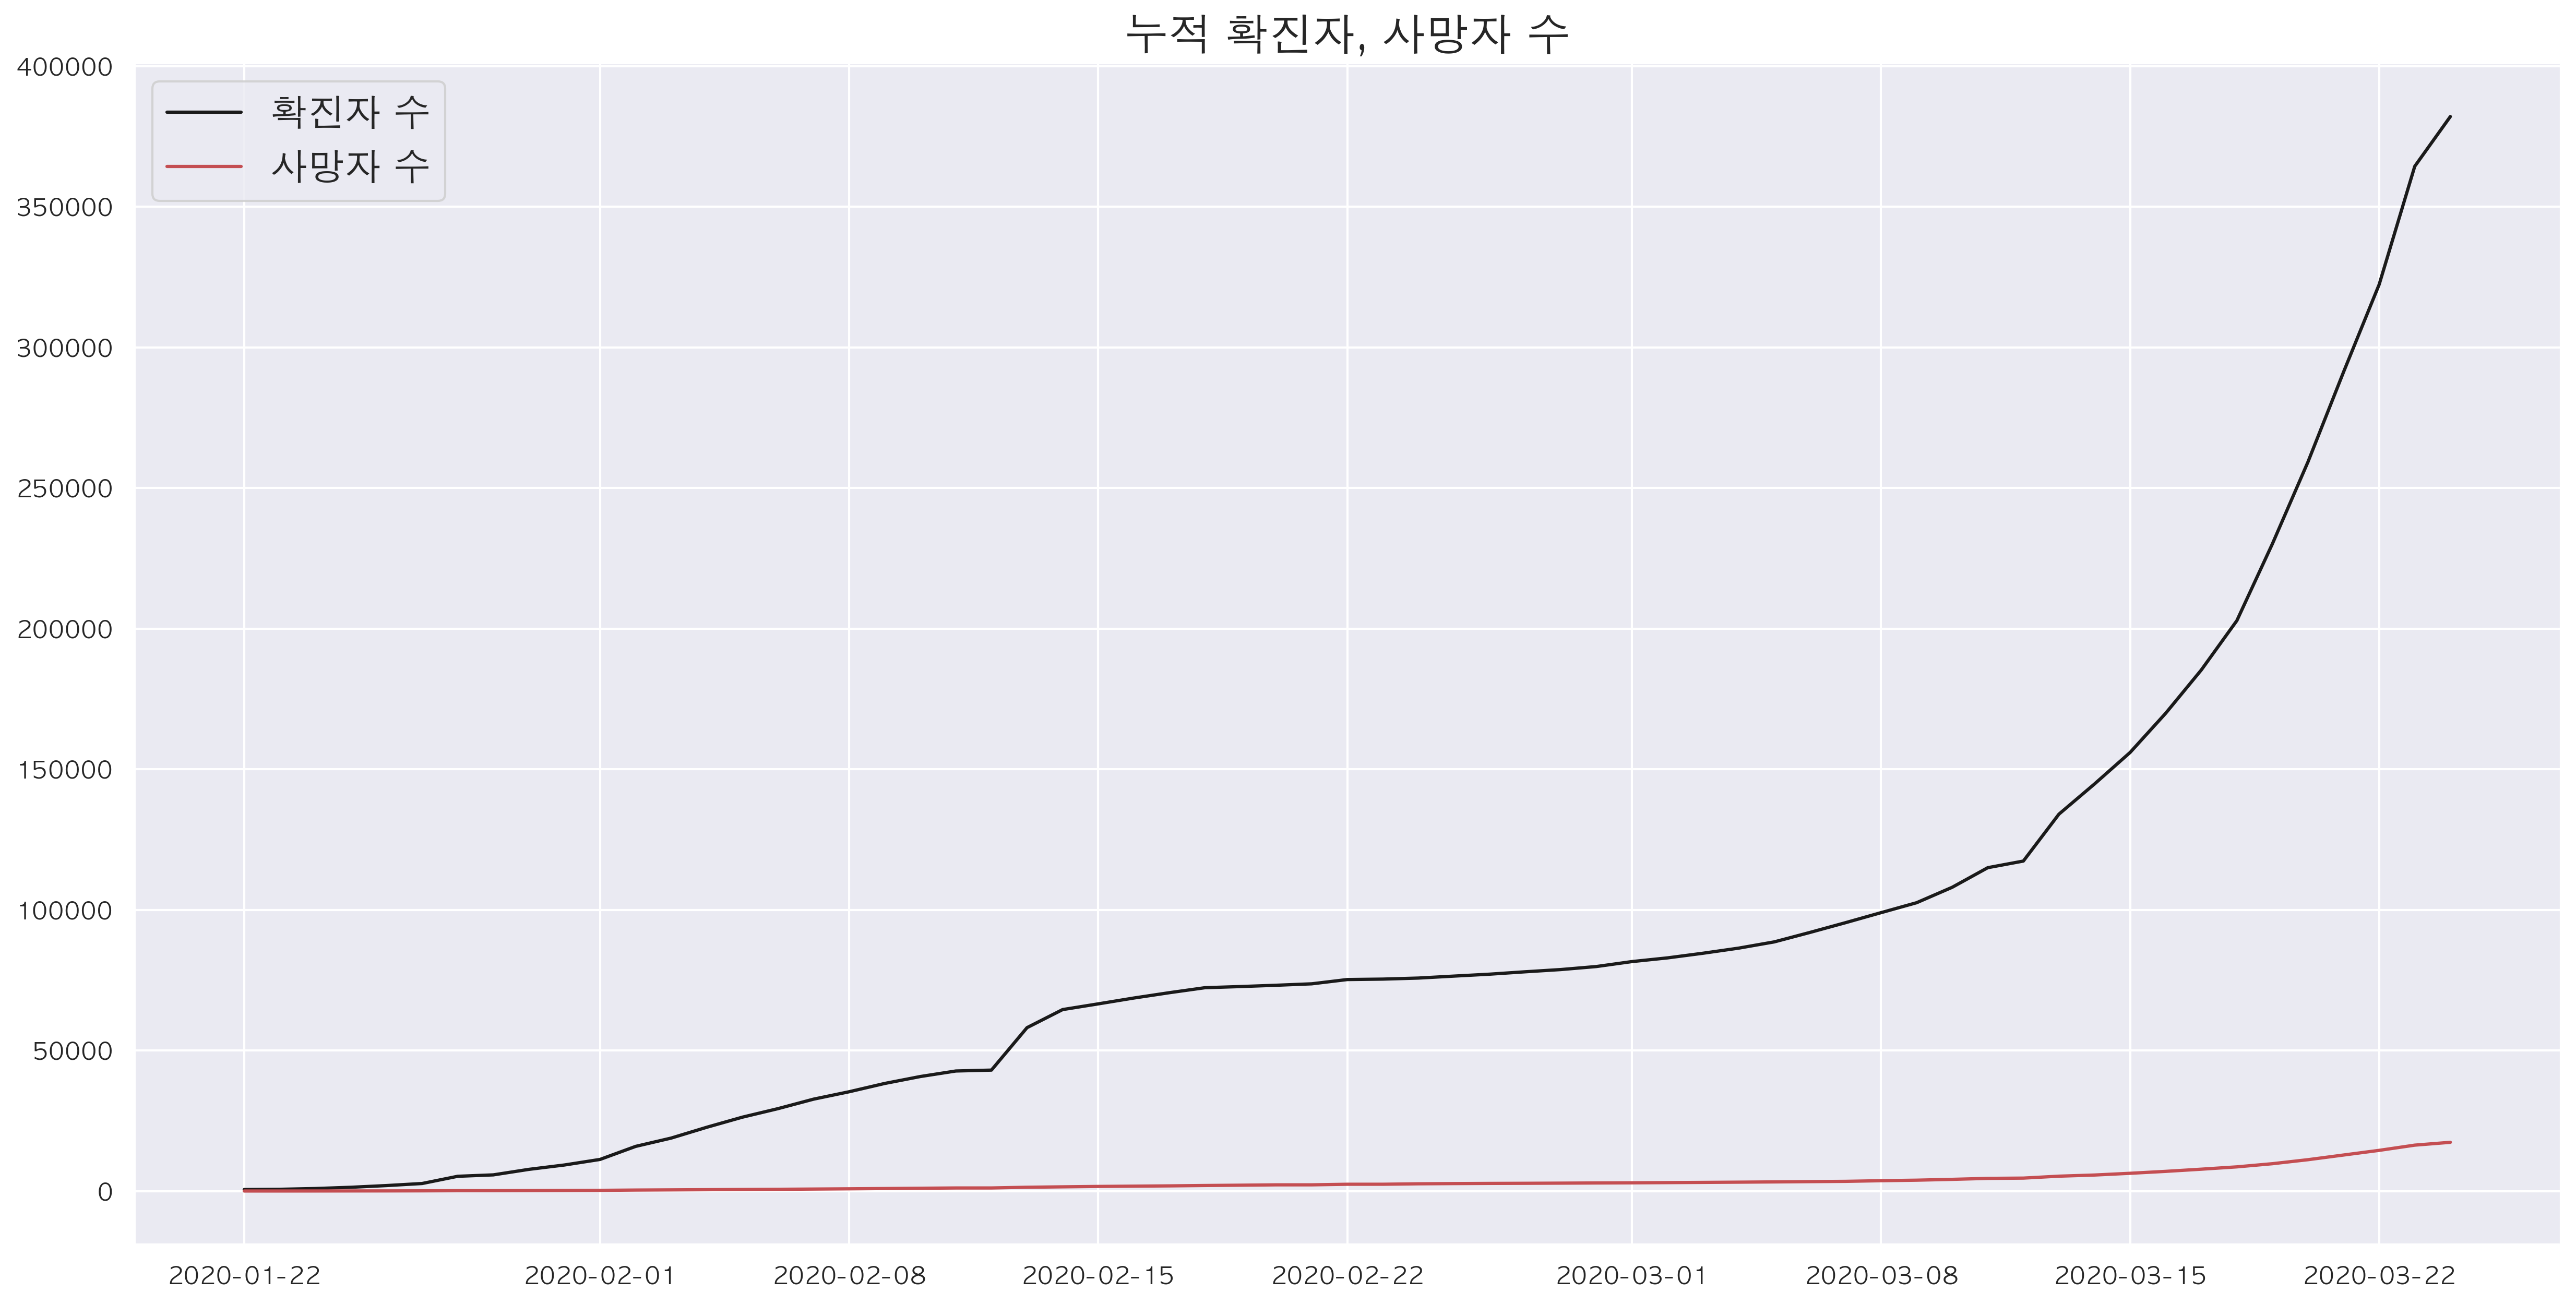

In [25]:
fig = plt.figure(figsize=(20,10))

plt.title('누적 확진자, 사망자 수', fontsize=20)

plt.plot(date_confirmed.ConfirmedCases, 'k', label='확진자 수')
plt.plot(date_death.Fatalities, 'r', label='사망자 수')

plt.legend(fontsize=17)
plt.show()

### 시계열 분석으로 확진자, 사망자 추이 예측

#### 확진자 수

In [26]:
date_ = pd.DataFrame(df2.ConfirmedCases.groupby(df2.date).agg(sum))
index_ = pd.DataFrame(date_.index)
confirmedcases_=pd.DataFrame(date_['ConfirmedCases'].values)
confirmedcases_df = pd.concat([index_, confirmedcases_], axis=1)
confirmedcases_df.columns = ['date','confirmedcases']
confirmedcases_df

,date,confirmedcases
0,2020-01-22,537
1,2020-01-23,625
2,2020-01-24,896
3,2020-01-25,1342
4,2020-01-26,1952
...,...,...
58,2020-03-20,259292
59,2020-03-21,291262
60,2020-03-22,322353
61,2020-03-23,364361


INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


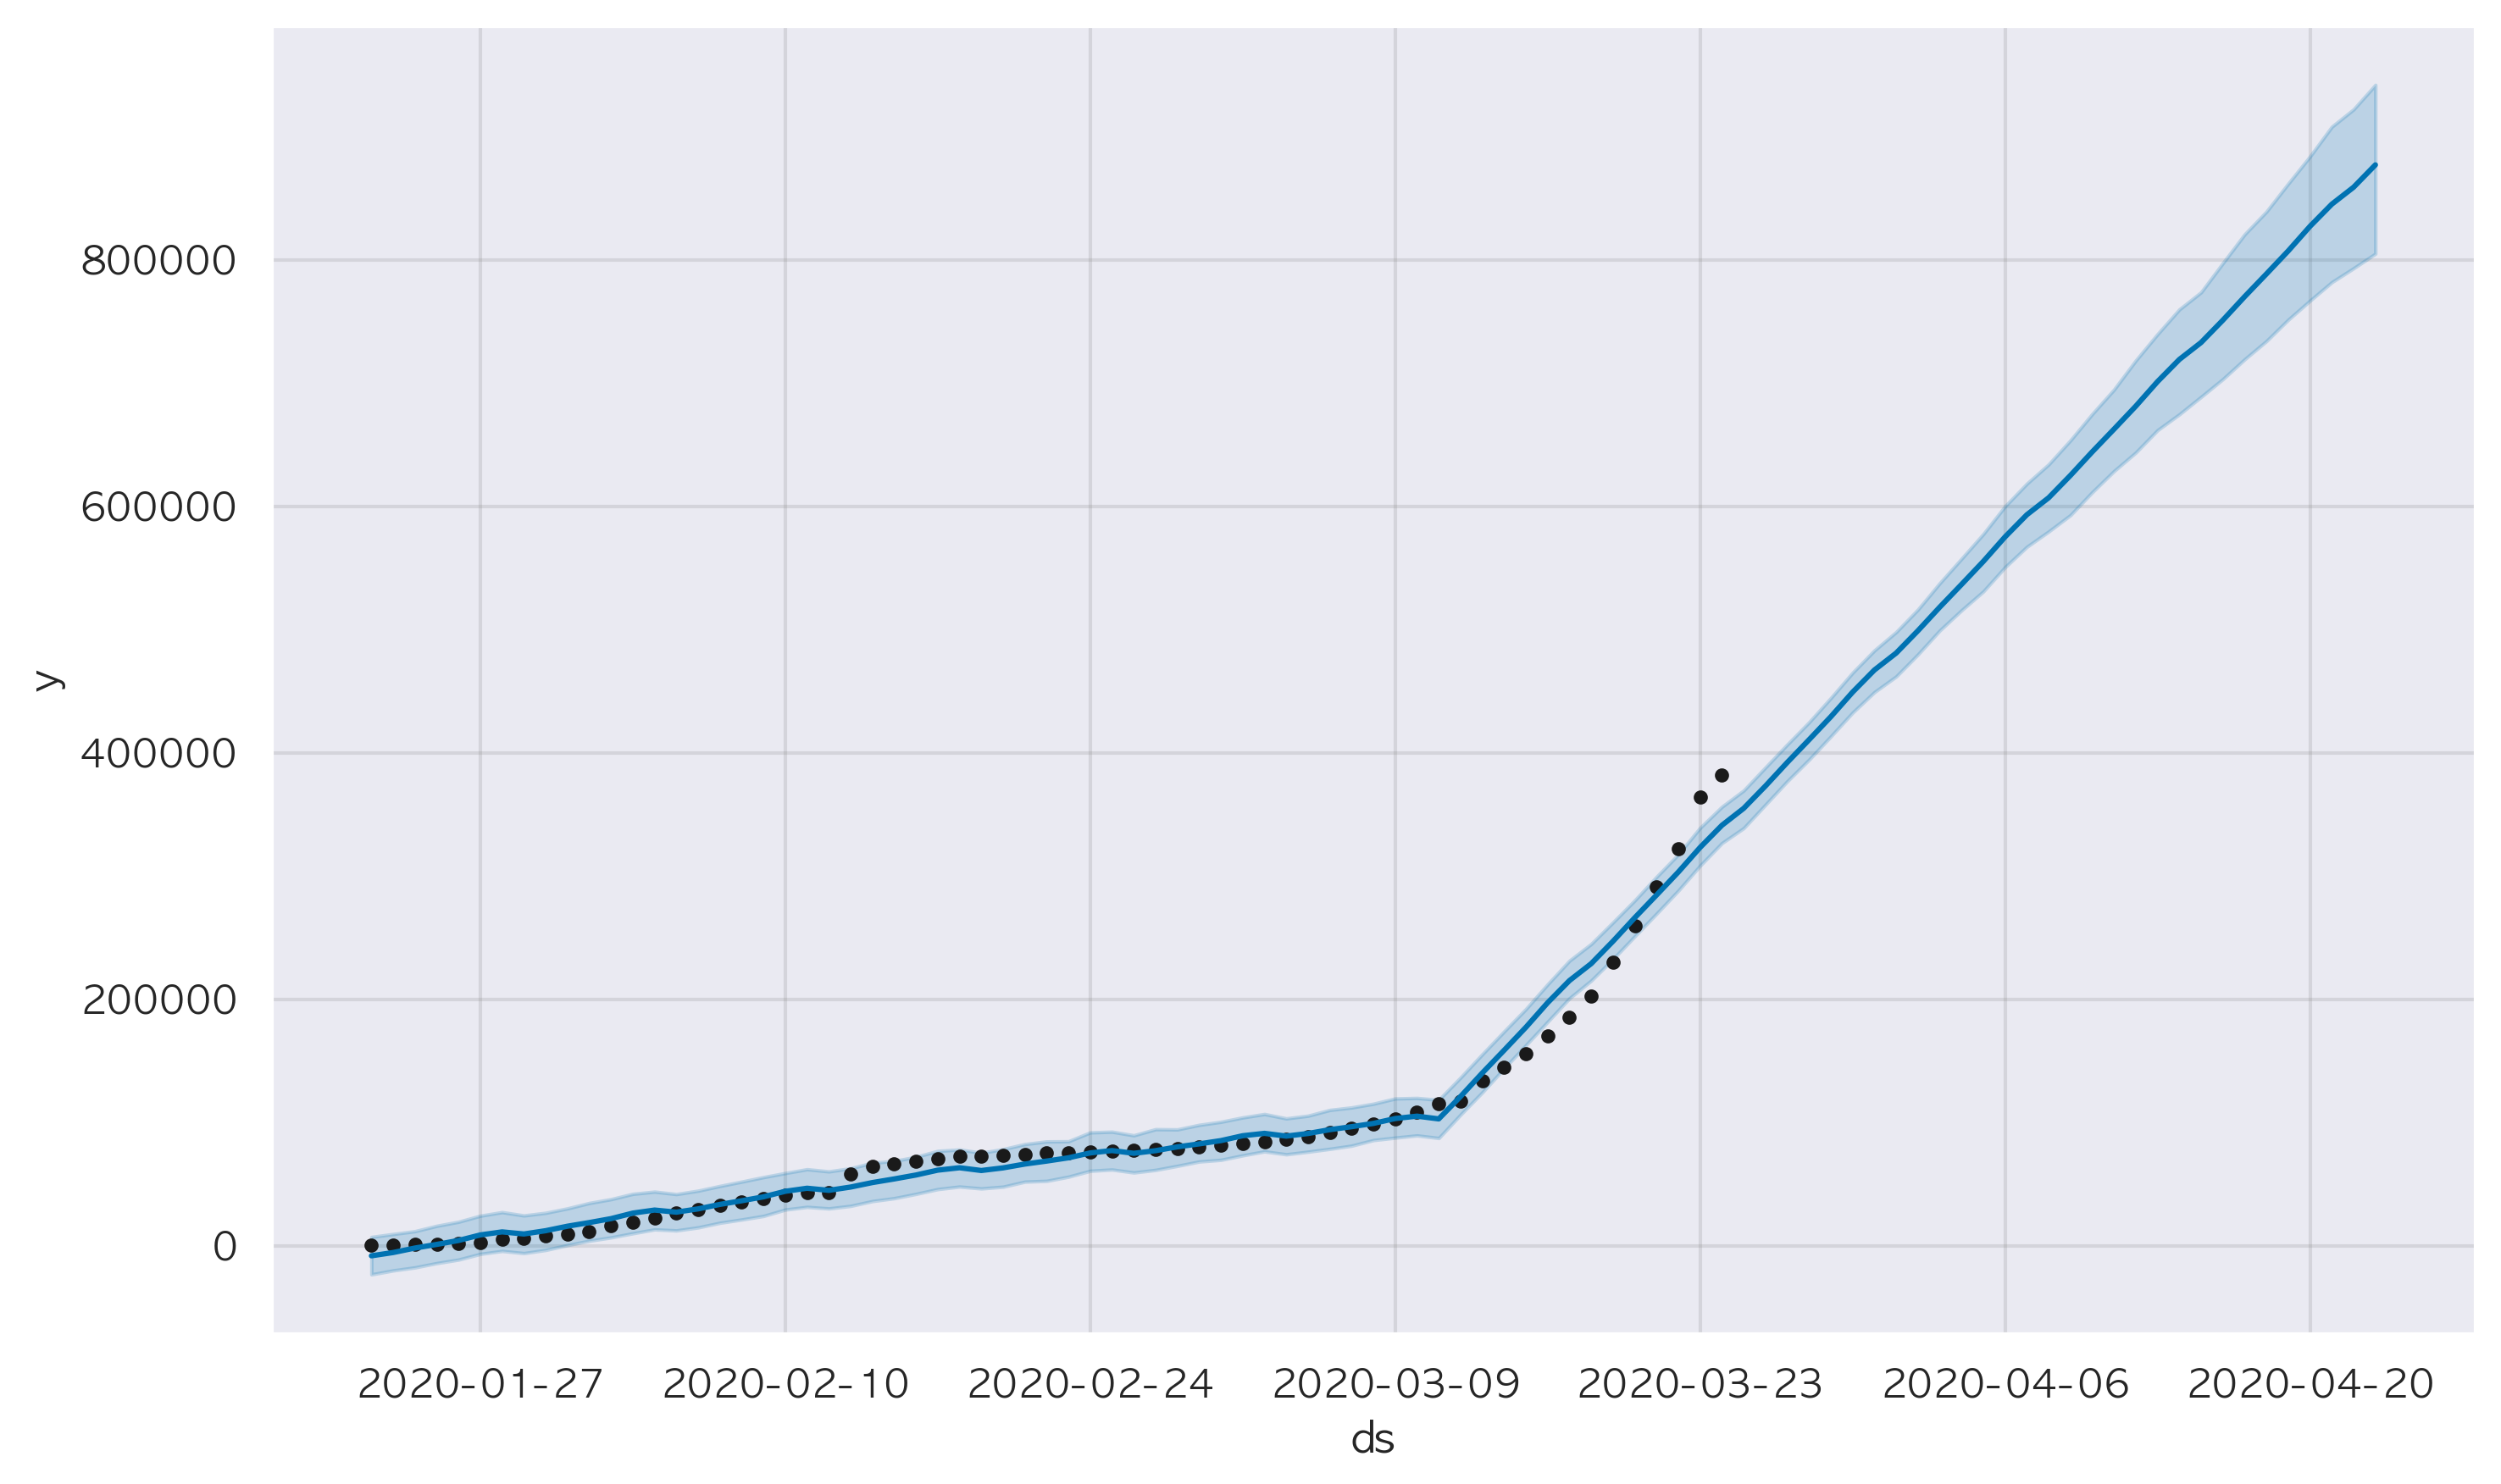

In [27]:
from fbprophet import Prophet
confirmedcase_df1 = pd.DataFrame({'ds': confirmedcases_df['date'], 'y':confirmedcases_df['confirmedcases']})
m = Prophet(daily_seasonality=True)
m.fit(confirmedcase_df1)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

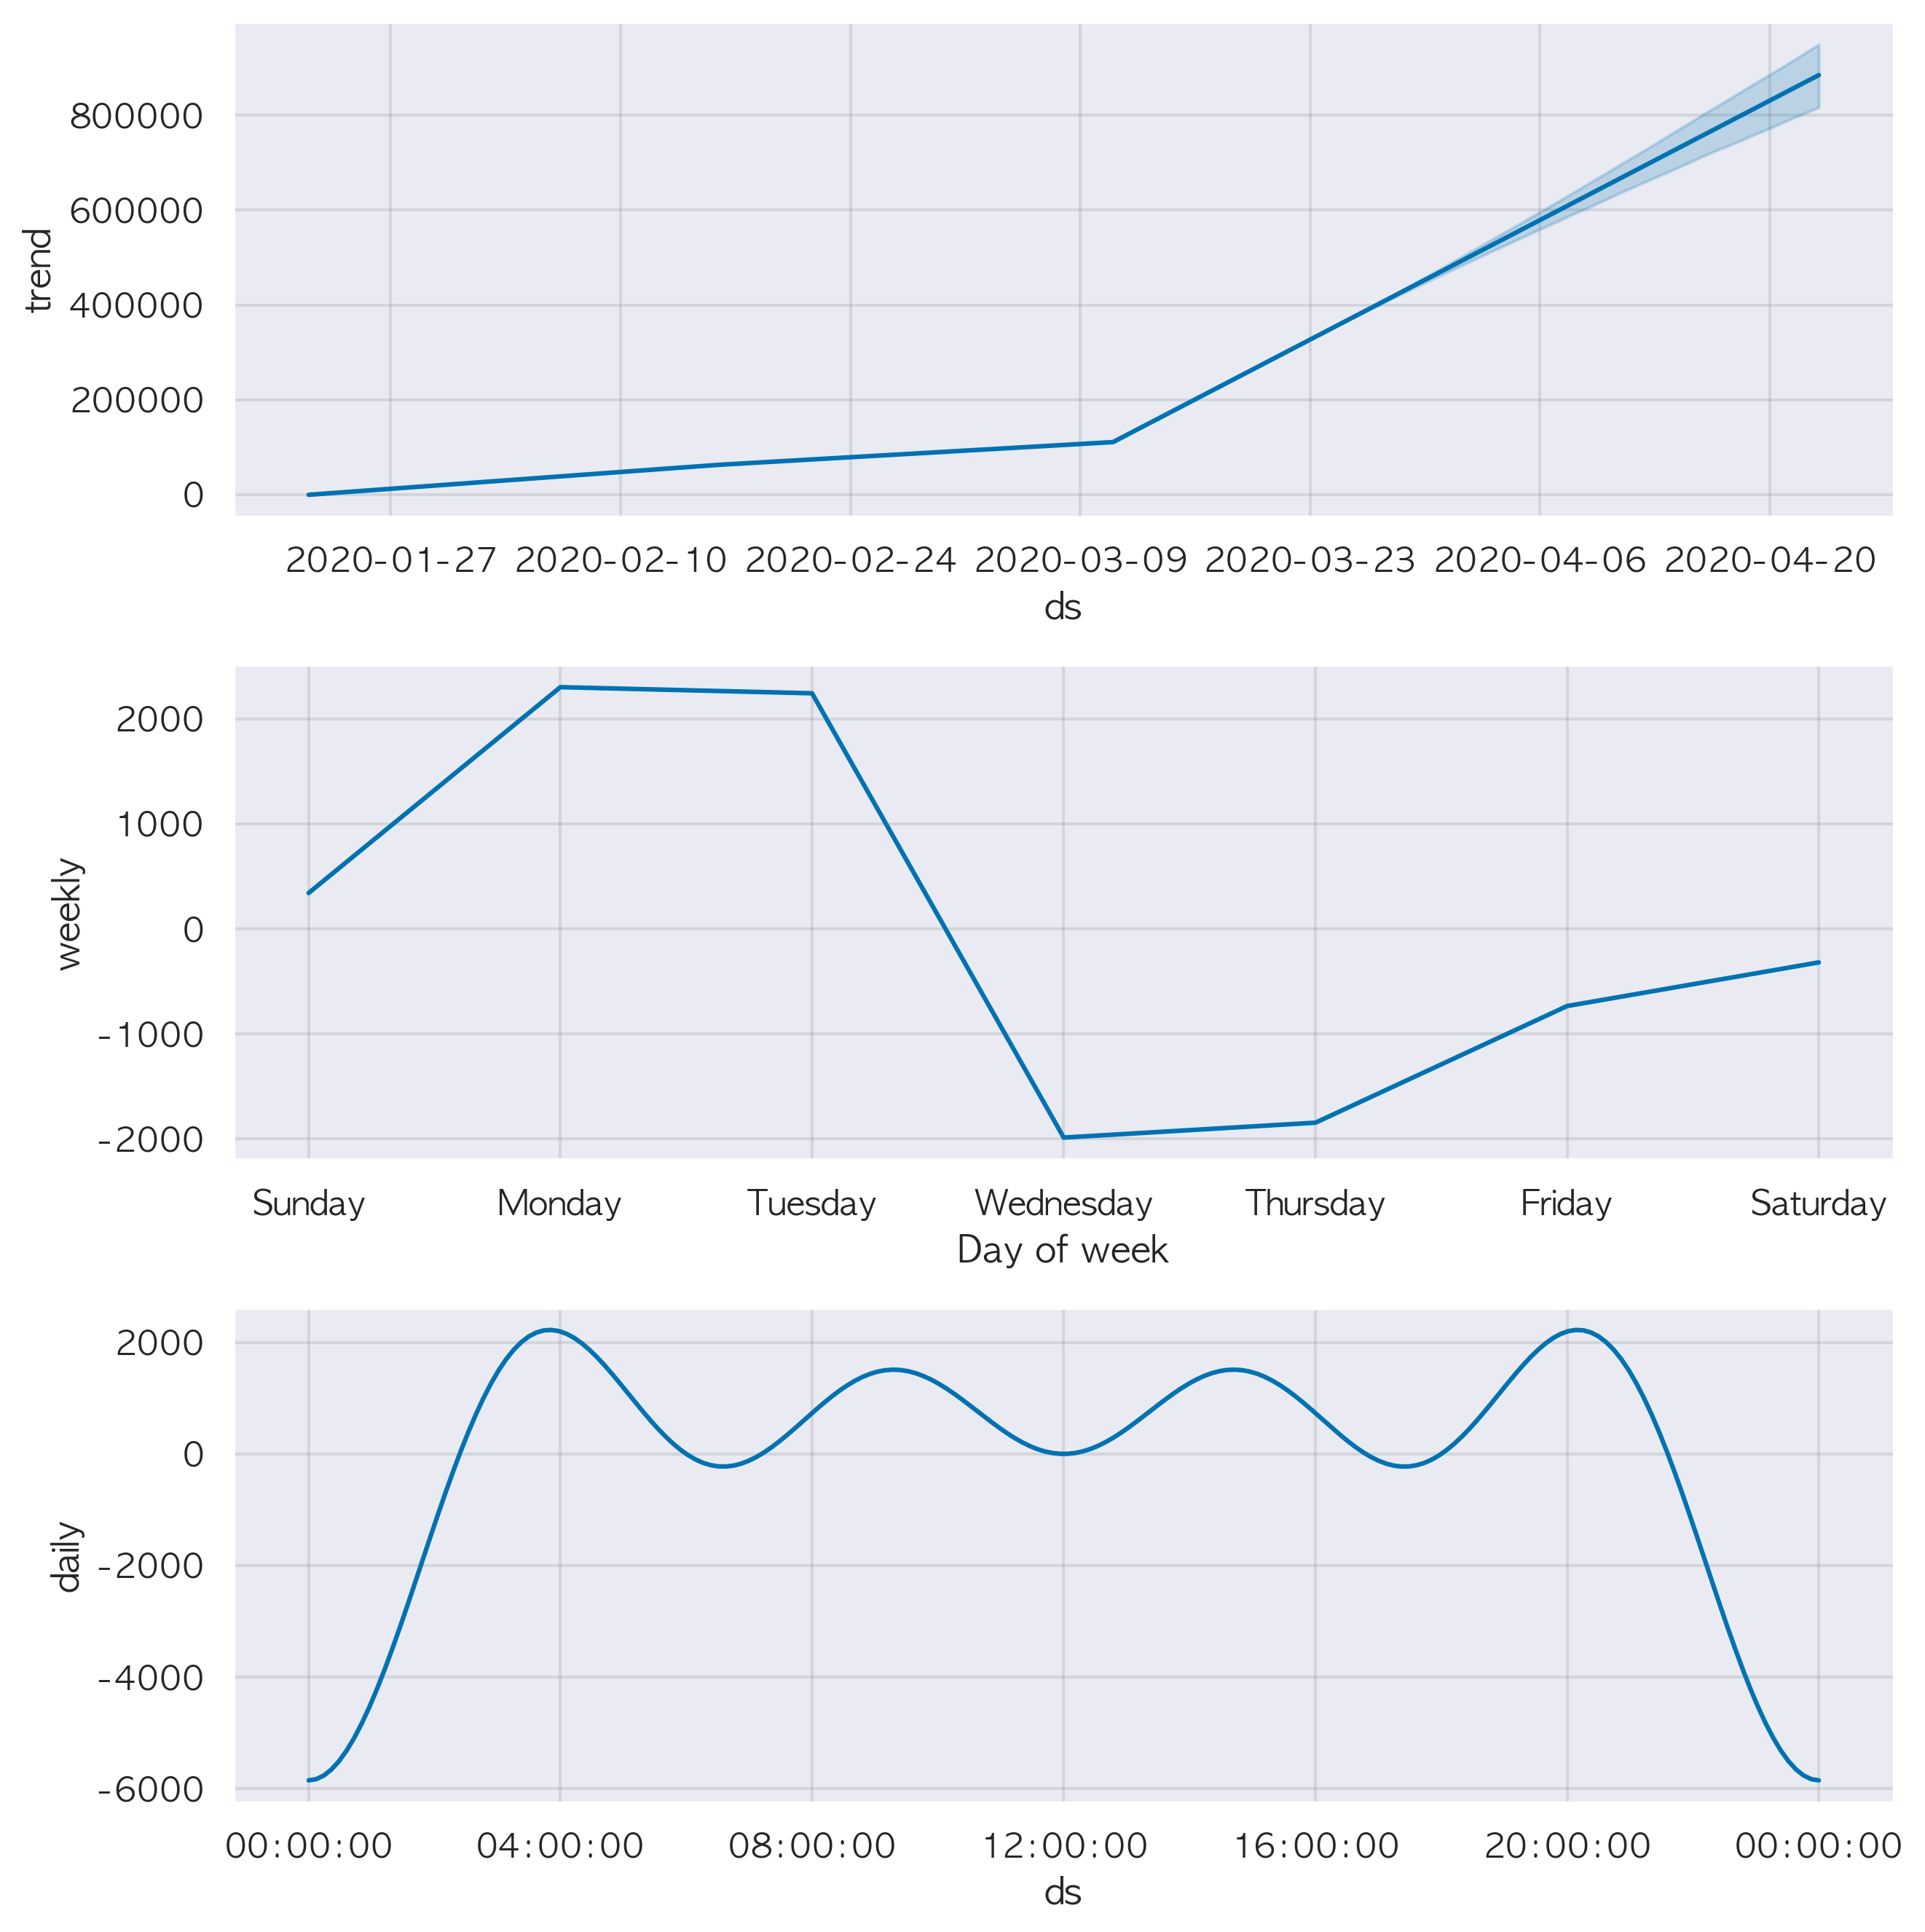

In [28]:
m.plot_components(forecast);

#### 사망자 수

In [29]:
date_1 = pd.DataFrame(df2.Fatalities.groupby(df2.date).agg(sum))
index_1 = pd.DataFrame(date_1.index)
fatalities_=pd.DataFrame(date_1['Fatalities'].values)
fatalities_df = pd.concat([index_1, fatalities_], axis=1)
fatalities_df.columns = ['date','fatalities']
fatalities_df

,date,fatalities
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,25
3,2020-01-25,41
4,2020-01-26,53
...,...,...
58,2020-03-20,11153
59,2020-03-21,12815
60,2020-03-22,14471
61,2020-03-23,16325


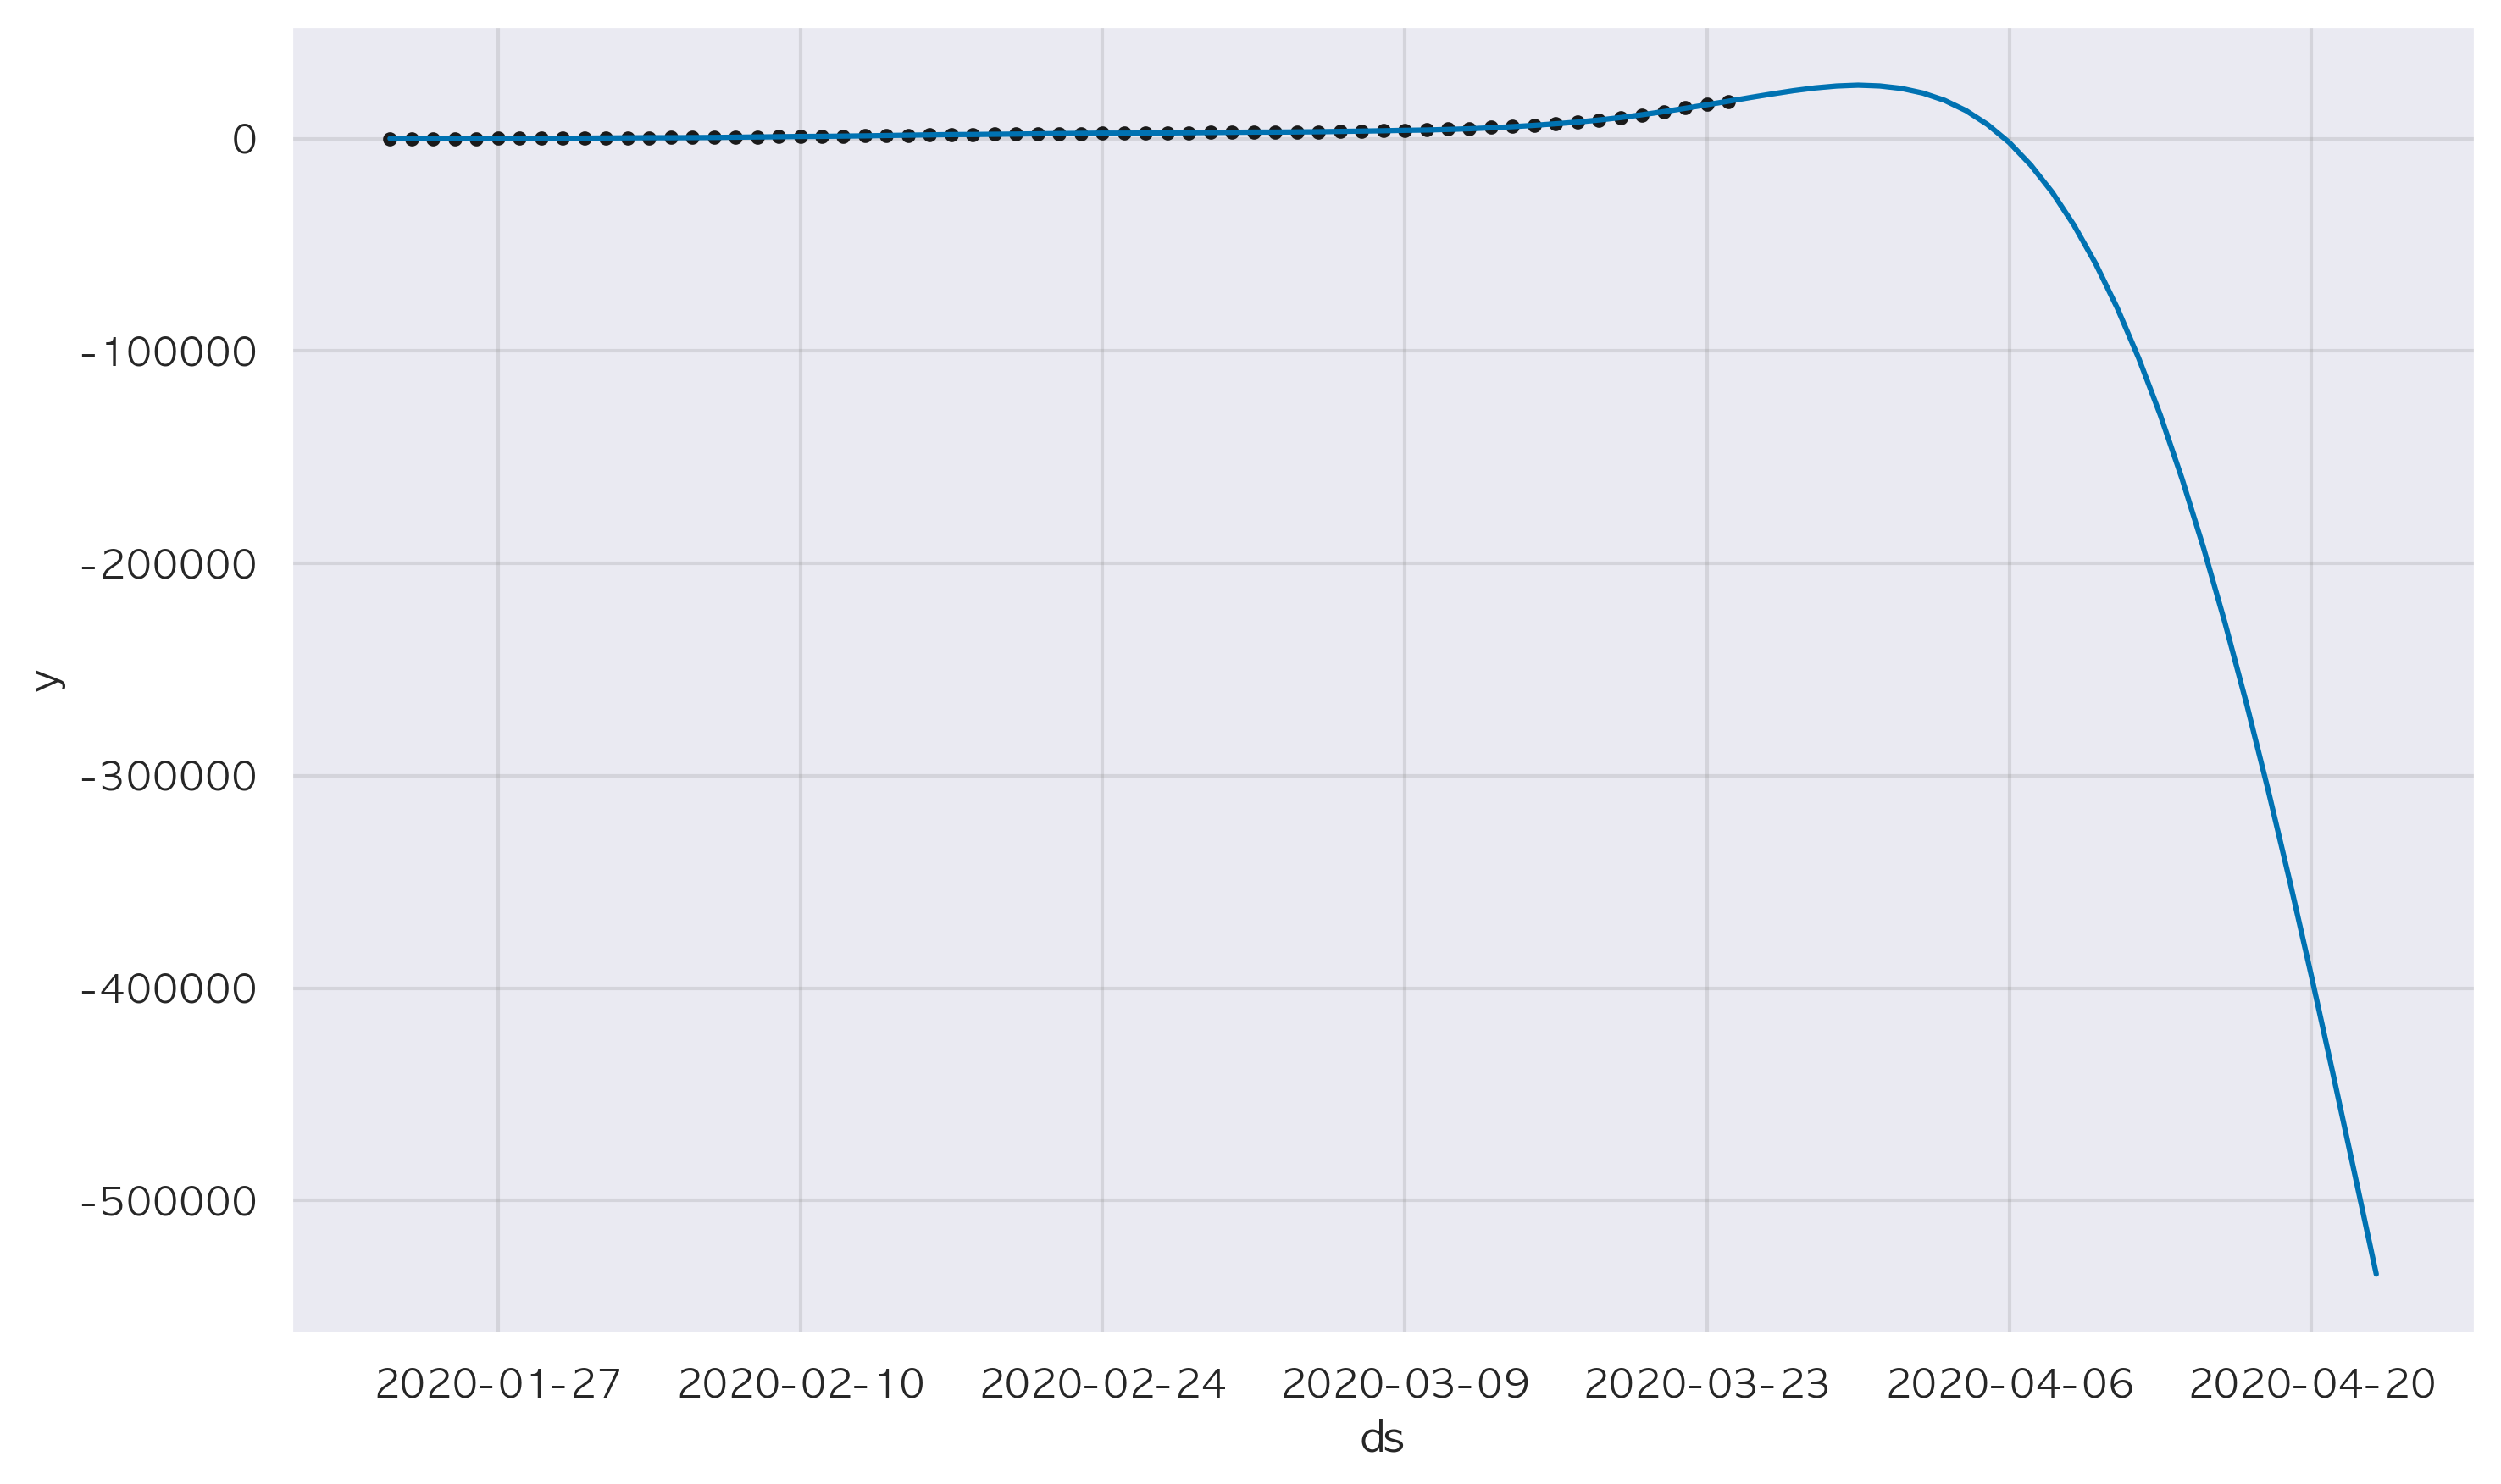

In [30]:
from fbprophet import Prophet

fatalities_df = pd.DataFrame({'ds': fatalities_df['date'], 'y':fatalities_df['fatalities']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(fatalities_df)
future = m.make_future_dataframe(periods=30)
forecast1 = m.predict(future)
m.plot(forecast1);

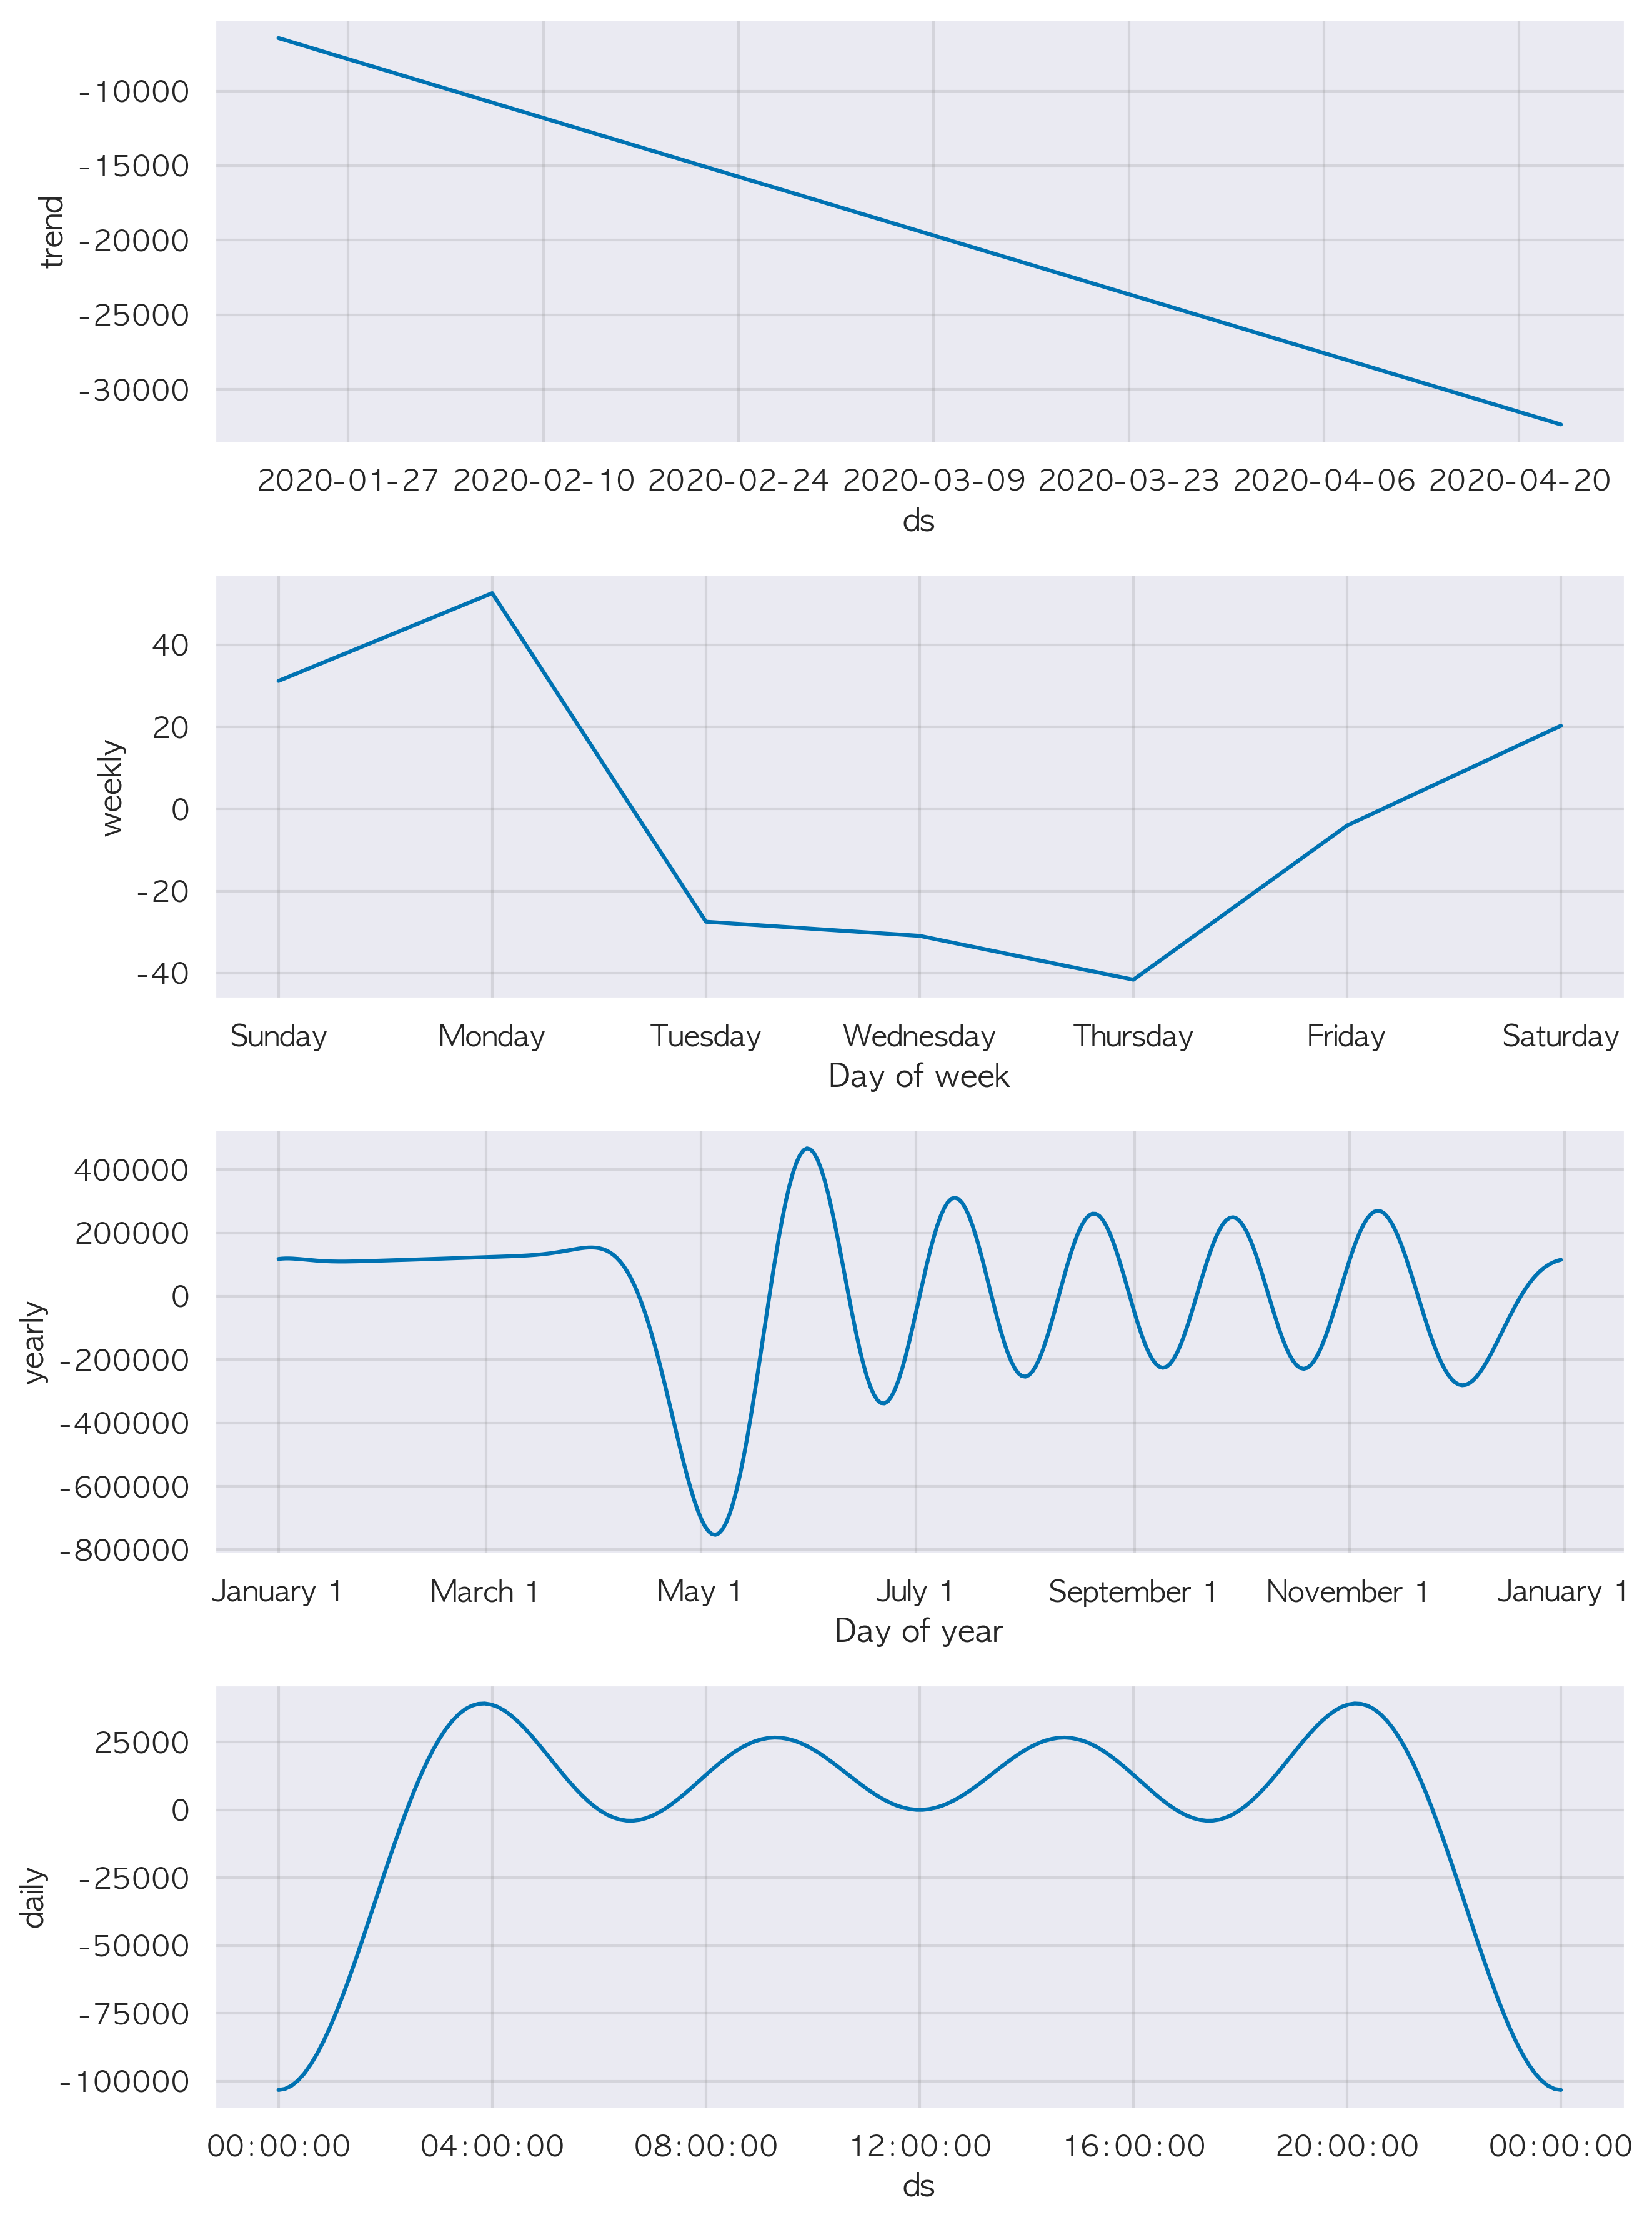

In [31]:
m.plot_components(forecast1);

### (6) 변수 간 상관 관계 파악

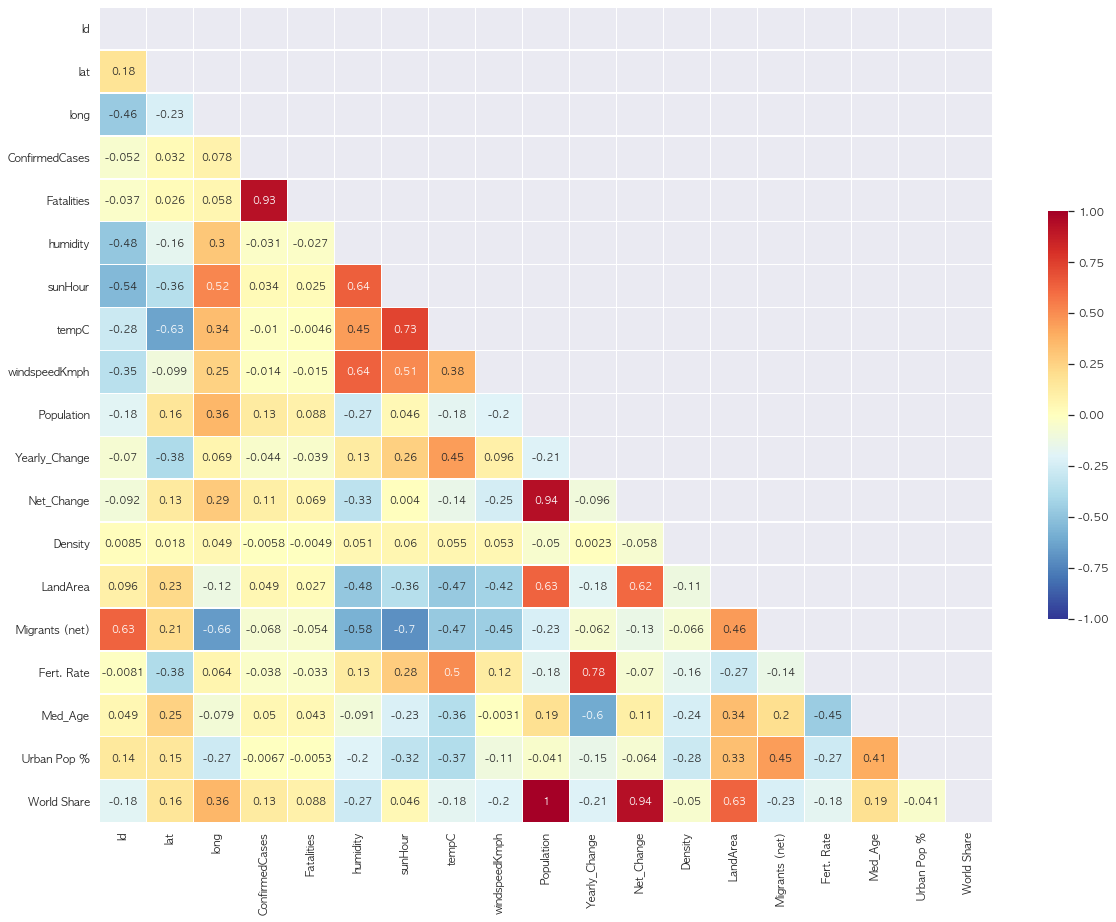

In [32]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

df = df2.corr()

fig, ax = plt.subplots( figsize=(20,15) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.show()

### (7) 다중 공선성 확인

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df3 = df2.drop(columns = ['country', 'date']) #정수, 실수형 데이터만 남기기

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif["features"] = df3.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.171044e+00,Density
1,2.162403e+00,long
2,3.826761e+00,windspeedKmph
3,4.385654e+00,lat
4,7.483070e+00,Fatalities
5,7.578615e+00,ConfirmedCases
6,7.742035e+00,Yearly_Change
7,7.836771e+00,Id
8,8.193519e+00,humidity
9,8.345860e+00,tempC


### 7. OLS

### (1) train, test 데이터 구분, train 데이터에서 회귀 모형 만들기

In [34]:
new_df2 = df2.drop(columns=['Fatalities'])
dfX = pd.DataFrame(new_df2, columns=new_df2.columns)
dfy = pd.DataFrame(df2.Fatalities, columns=["Fatalities"])
df = pd.concat([dfX, dfy], axis=1)

In [35]:
N = len(df2)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

df_train = df2.iloc[idx_train]
df_test = df2.iloc[idx_test]

In [36]:
import statsmodels.api as sm
model = sm.OLS.from_formula("Fatalities ~  scale(Population) + scale(windspeedKmph) + scale(ConfirmedCases)", df_train)
result = model.fit()
print(result.summary(()))

                            OLS Regression Results                            
Dep. Variable:                     ()   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 2.665e+04
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:50:00   Log-Likelihood:                -66538.
No. Observations:               11818   AIC:                         1.331e+05
Df Residuals:                   11814   BIC:                         1.331e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                13.46

### (2) CCPR 

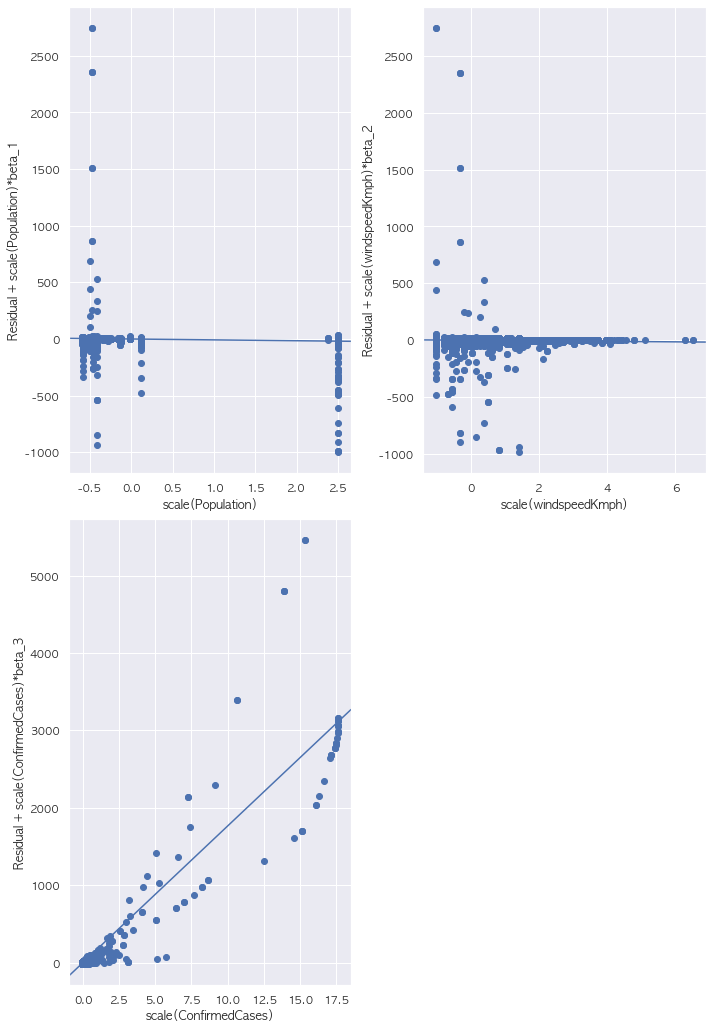

In [37]:
fig = plt.figure(figsize=(10,15))
sm.graphics.plot_ccpr_grid(result, fig=fig)
fig.suptitle("")
plt.show()

### (3) test 데이터에서도 성능 구하기

In [38]:
pred = result.predict(df_test)

rss = ((df_test.Fatalities - pred) ** 2).sum()
tss = ((df_test.Fatalities - df_test.Fatalities.mean())** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.8459219172445265

### (4) K폴드 교차검증

In [39]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = StatsmodelsOLS("Fatalities ~  scale(Population) + scale(windspeedKmph) + scale(ConfirmedCases)")
cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(model, dfX, dfy, scoring="r2", cv=cv)

array([0.78566515, 0.93103732, 0.91292491, 0.92288677, 0.81670443])

In [41]:
pred_Fatalities=pd.DataFrame(result.predict(dfX))
result_df = pd.concat([df2.Fatalities,pred_Fatalities], axis=1, names=['Fatalities', 'pred_Fatalities'])
result_df.rename(columns={0:'pred_Fatalities'}, inplace=True)
result_df

,Fatalities,pred_Fatalities
0,0,1.026394
1,0,1.026394
2,0,1.289075
3,0,1.289075
4,0,1.026394
...,...,...
17887,0,0.666678
17888,0,1.192041
17889,0,3.602329
17890,0,3.602329
